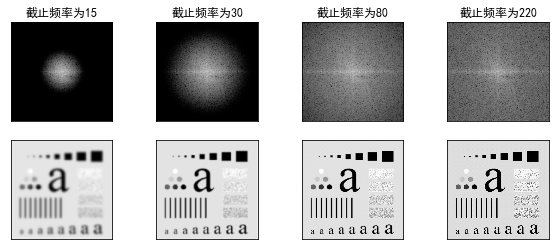

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

img = cv.imread(r'..\img\alphabet.jpg', 0)
f = np.fft.fft2(img)
fshift0 = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(1+np.abs(fshift0))
angle_spectrum = np.abs(np.angle(fshift0))

dd=[15,30,80,220]

rows, cols = img.shape
crow, ccol = rows//2, cols//2
fshift=np.zeros((4,rows,cols))+0j
img_back=np.zeros((4,rows,cols))
i=0
for d in dd:
    d0=d**2
    H=np.zeros((rows,cols))
    for u in range(rows):
        for v in range(cols):
            d=(u-crow)**2+(v-ccol)**2
            H[u,v]=np.exp(-d/(2*d0))
    fshift[i]=fshift0*H
    f_ishift = np.fft.ifftshift(fshift[i])
    temp = np.fft.ifft2(f_ishift)
    img_back[i,:,:] = np.abs(temp)
    i=i+1
    

plt.figure(figsize=(10,4))
for i in range(4):
    plt.subplot(2,4,i+1),plt.imshow(20 * np.log(1+np.abs(fshift[i])), cmap = 'gray')
    plt.title('截止频率为'+str(dd[i])), plt.xticks([]), plt.yticks([])
    plt.subplot(2,4,4+i+1),plt.imshow(img_back[i],cmap = 'gray')
    plt.xticks([]), plt.yticks([])
plt.savefig("ch4-20.jpg")
# plt.show()
